In [68]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# FRAUD TRAIN

In [69]:
df_train = pd.read_csv(r"C:\Users\HP\Downloads\PROJECT [DS]\Credit Card\fraudTrain.csv")

In [70]:
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [71]:
df_train.shape

(1296675, 23)

In [72]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [74]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [75]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [76]:
duplicates_rows_train = df_train.duplicated().sum()
print(f"Number of duplicate rows in Train data : {duplicates_rows_train}")

Number of duplicate rows in Train data : 0


In [77]:
duplicates_train_columns = df_train.columns.duplicated().sum()
print(f"Number of duplicate columns in Train Data : {duplicates_train_columns}")

Number of duplicate columns in Train Data : 0


In [78]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [79]:
df_train.drop(columns = ["Unnamed: 0","first","last","street","city","state","zip","unix_time","trans_num"], axis = 1 , inplace = True)

In [80]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [81]:
df_train["trans_date_trans_time"] = pd.to_datetime(df_train["trans_date_trans_time"])
df_train["dob"] = pd.to_datetime(df_train["dob"])

In [82]:
df_train["hour"] = df_train["trans_date_trans_time"].dt.hour         
df_train["day"] = df_train["trans_date_trans_time"].dt.day    
df_train["weekday"] = df_train["trans_date_trans_time"].dt.weekday  
df_train["month"] = df_train["trans_date_trans_time"].dt.month    
df_train["year"] = df_train["trans_date_trans_time"].dt.year

In [83]:
df_train[['trans_date_trans_time','hour','day','weekday','month','year']].head()

,trans_date_trans_time,hour,day,weekday,month,year
0,2019-01-01 00:00:18,0,1,1,1,2019
1,2019-01-01 00:00:44,0,1,1,1,2019
2,2019-01-01 00:00:51,0,1,1,1,2019
3,2019-01-01 00:01:16,0,1,1,1,2019
4,2019-01-01 00:03:06,0,1,1,1,2019


In [84]:
num_train = df_train.select_dtypes(include = ["int","float"])

In [85]:
num_train

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year
0,2703186189652095,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,1,1,1,2019
1,630423337322,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,0,1,1,1,2019
2,38859492057661,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,1,1,1,2019
3,3534093764340240,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,1,1,1,2019
4,375534208663984,41.96,38.4207,-79.4629,99,38.674999,-78.632459,0,0,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,37.7175,-112.4777,258,36.841266,-111.690765,0,12,21,6,6,2020
1296671,6011149206456997,51.70,39.2667,-77.5101,100,38.906881,-78.246528,0,12,21,6,6,2020
1296672,3514865930894695,105.93,32.9396,-105.8189,899,33.619513,-105.130529,0,12,21,6,6,2020
1296673,2720012583106919,74.90,43.3526,-102.5411,1126,42.788940,-103.241160,0,12,21,6,6,2020


In [86]:
cat_train = df_train.select_dtypes(include = ["object"])

In [87]:
cat_train

,merchant,category,gender,job
0,"fraud_Rippin, Kub and Mann",misc_net,F,"Psychologist, counselling"
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,Special educational needs teacher
2,fraud_Lind-Buckridge,entertainment,M,Nature conservation officer
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,Patent attorney
4,fraud_Keeling-Crist,misc_pos,M,Dance movement psychotherapist
...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,M,Geoscientist
1296671,fraud_Abernathy and Sons,food_dining,M,"Production assistant, television"
1296672,fraud_Stiedemann Ltd,food_dining,M,Naval architect
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,M,Volunteer coordinator


In [88]:
df_train["is_fraud"].replace({0: "Non-Fraud", 1: "Fraud"}).value_counts(normalize=True) * 100

is_fraud
Non-Fraud    99.421135
Fraud         0.578865
Name: proportion, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_3700\3904386888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_train , x = 'is_fraud', palette = ['skyblue', 'red'])


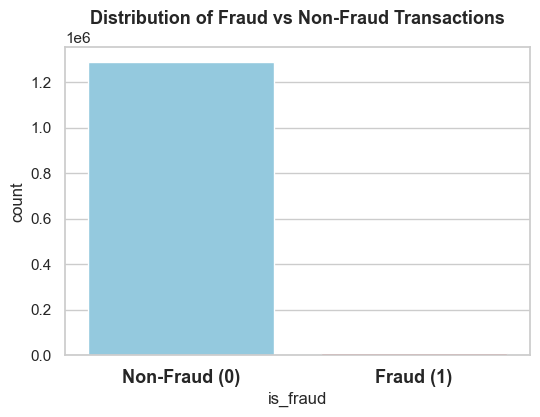

In [89]:
sns.set(style = "whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data = df_train , x = 'is_fraud', palette = ['skyblue', 'red'])
plt.title('Distribution of Fraud vs Non-Fraud Transactions',fontsize = 13 , fontweight = 'bold')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'] , fontsize = 13, fontweight = 'bold')
plt.show()

In [90]:
train_corr = df_train.select_dtypes(include = ["int","float"])
train_corr

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year
0,2703186189652095,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,1,1,1,2019
1,630423337322,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,0,1,1,1,2019
2,38859492057661,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,1,1,1,2019
3,3534093764340240,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,1,1,1,2019
4,375534208663984,41.96,38.4207,-79.4629,99,38.674999,-78.632459,0,0,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,37.7175,-112.4777,258,36.841266,-111.690765,0,12,21,6,6,2020
1296671,6011149206456997,51.70,39.2667,-77.5101,100,38.906881,-78.246528,0,12,21,6,6,2020
1296672,3514865930894695,105.93,32.9396,-105.8189,899,33.619513,-105.130529,0,12,21,6,6,2020
1296673,2720012583106919,74.90,43.3526,-102.5411,1126,42.788940,-103.241160,0,12,21,6,6,2020


In [91]:
corr_train = train_corr.corr()
corr_train

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year
cc_num,1.000000,0.001769,-0.059271,-0.048278,-0.008991,-0.058942,-0.048252,-0.000981,-0.000801,0.000545,-0.002481,-0.000281,0.000466
amt,0.001769,1.000000,-0.001926,-0.000187,0.005818,-0.001873,-0.000151,0.219404,-0.022811,0.000629,-0.001001,-0.001748,0.000842
lat,-0.059271,-0.001926,1.000000,-0.015533,-0.155730,0.993592,-0.015509,0.001894,-0.011508,-0.000138,0.000498,-0.001072,0.001274
long,-0.048278,-0.000187,-0.015533,1.000000,-0.052715,-0.015452,0.999120,0.001721,-0.002290,0.000031,0.001593,-0.001213,0.000191
city_pop,-0.008991,0.005818,-0.155730,-0.052715,1.000000,-0.154781,-0.052687,0.002136,0.020381,0.000159,0.002439,0.000137,-0.001673
merch_lat,-0.058942,-0.001873,0.993592,-0.015452,-0.154781,1.000000,-0.015431,0.001741,-0.011378,-0.000276,0.000263,-0.001116,0.001244
merch_long,-0.048252,-0.000151,-0.015509,0.999120,-0.052687,-0.015431,1.000000,0.001721,-0.002325,0.000076,0.001553,-0.001197,0.000184
is_fraud,-0.000981,0.219404,0.001894,0.001721,0.002136,0.001741,0.001721,1.000000,0.013799,0.003848,0.001739,-0.012409,0.003004
hour,-0.000801,-0.022811,-0.011508,-0.002290,0.020381,-0.011378,-0.002325,0.013799,1.000000,-0.000170,0.000219,-0.000356,-0.000811
day,0.000545,0.000629,-0.000138,0.000031,0.000159,-0.000276,0.000076,0.003848,-0.000170,1.000000,0.018181,0.012434,-0.045759


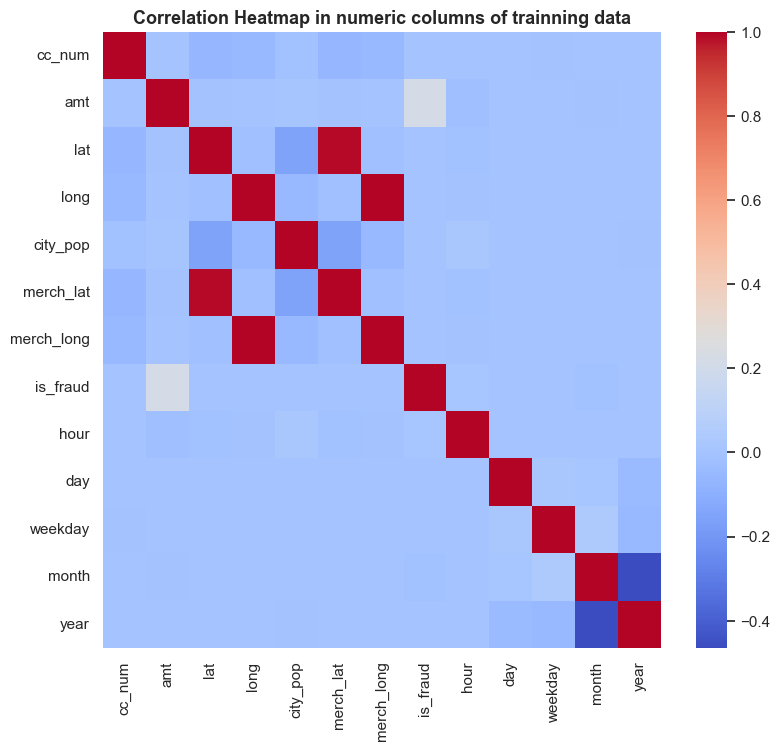

In [92]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_train, cmap='coolwarm', annot = False)
plt.title("Correlation Heatmap in numeric columns of trainning data", fontsize = 13 , fontweight = 'bold')
plt.show()

In [93]:
train_target_corr = corr_train['is_fraud'].sort_values(ascending=False)
print("🔝 Top correlated features with 'is_fraud' of train data:\n")
print(train_target_corr.head(10))


🔝 Top correlated features with 'is_fraud' of train data:

is_fraud      1.000000
amt           0.219404
hour          0.013799
day           0.003848
year          0.003004
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
weekday       0.001739
merch_long    0.001721
Name: is_fraud, dtype: float64


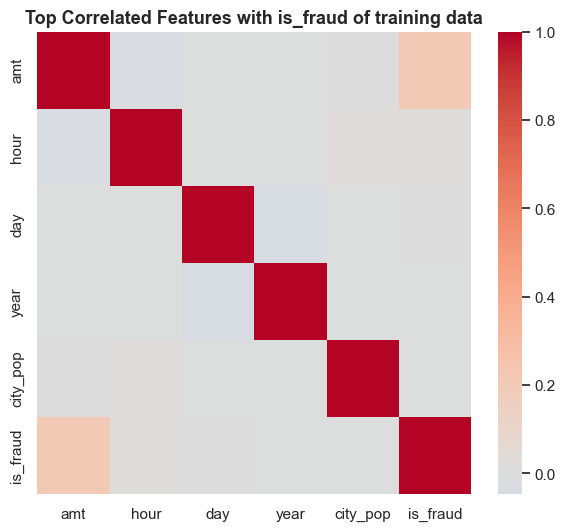

In [94]:
top_features = train_target_corr.index[1:6]
subset = train_corr[top_features.tolist() + ['is_fraud']]
plt.figure(figsize=(7,6))
sns.heatmap(subset.corr(), cmap='coolwarm', center=0, annot= False)
plt.title("Top Correlated Features with is_fraud of training data", fontweight = 'bold',fontsize = 13)
plt.show()  

C:\Users\HP\AppData\Local\Temp\ipykernel_3700\3017649270.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.boxplot(x ='is_fraud', y = 'amt' , data = df_train , hue = 'is_fraud', color = 'r')


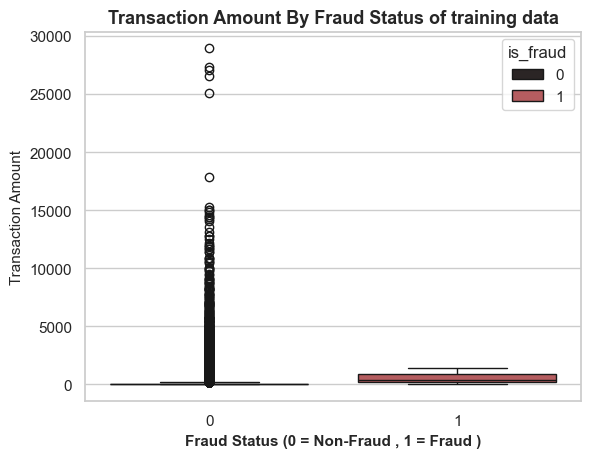

In [95]:
sns.set(style = "whitegrid")
sns.boxplot(x ='is_fraud', y = 'amt' , data = df_train , hue = 'is_fraud', color = 'r')
plt.title("Transaction Amount By Fraud Status of training data", fontsize = 13,  fontweight = 'bold')
plt.xlabel("Fraud Status (0 = Non-Fraud , 1 = Fraud )", fontsize = 11 , fontweight = 'bold')
plt.ylabel("Transaction Amount" , fontsize = 11)
plt.show()

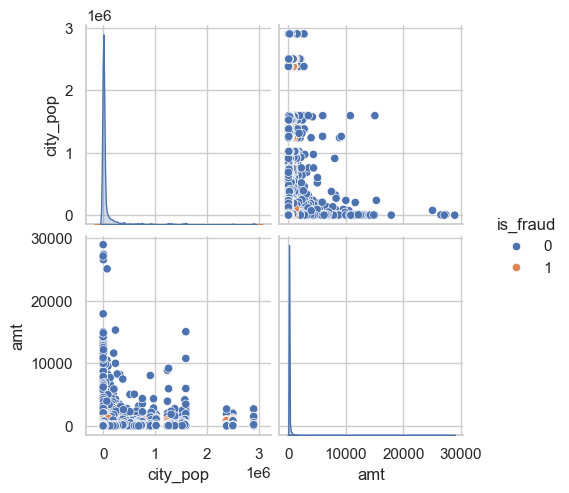

In [96]:
sns.pairplot(df_train,vars =['city_pop','amt'],hue = 'is_fraud')
plt.show()

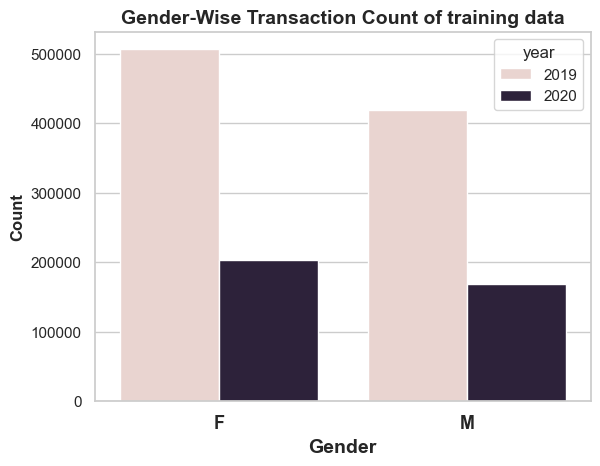

In [97]:
sns.countplot(x = 'gender' , data = df_train , hue = "year") 
plt.title("Gender-Wise Transaction Count of training data" , fontsize = 14 , fontweight = 'bold')
plt.xlabel("Gender",fontsize = 14 , fontweight = 'bold')
plt.xticks(['F','M'] , fontsize = 13, fontweight = 'bold')
plt.ylabel("Count",fontsize = 12 , fontweight = 'bold')
plt.show()

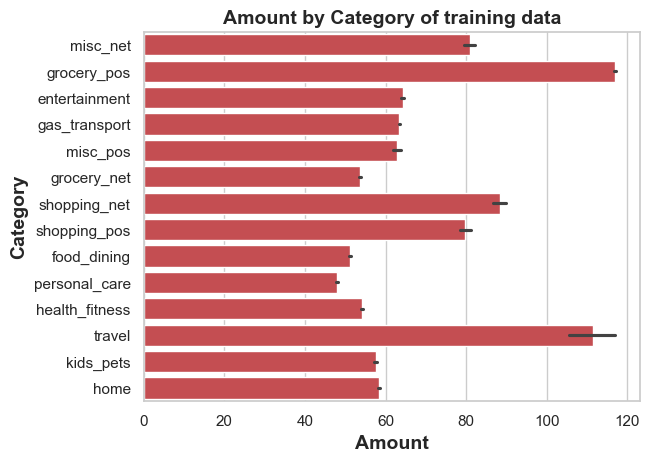

In [98]:
sns.barplot(x = "amt" , y = "category" , data = df_train , saturation = 1 , color = 'r' )
plt.xlabel('Amount', fontsize = 14 , fontweight = 'bold')
plt.ylabel('Category', fontsize = 14 , fontweight = 'bold')
plt.title('Amount by Category of training data', fontsize=14, fontweight = 'bold')
plt.show()

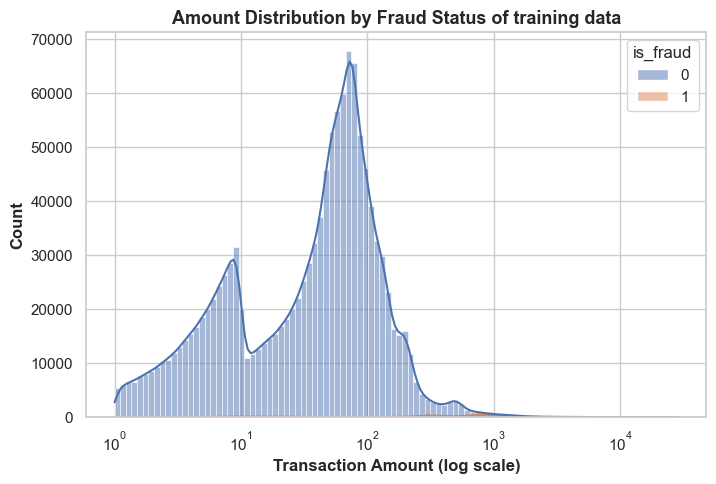

In [99]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_train, x='amt', hue='is_fraud', bins=100, kde=True, log_scale=True)
plt.title('Amount Distribution by Fraud Status of training data', fontsize = 13 ,  fontweight = 'bold')
plt.xlabel('Transaction Amount (log scale)',fontsize = 12 , fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight = 'bold')
plt.show()

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scl = StandardScaler()
le = LabelEncoder()

In [101]:
le

LabelEncoder()

In [102]:
a = list(cat_train.columns) 
for i in a:
    cat_train[i] = le.fit_transform(cat_train[i])

In [103]:
cat_train

,merchant,category,gender,job
0,514,8,0,370
1,241,4,0,428
2,390,0,1,307
3,360,2,1,328
4,297,9,1,116
...,...,...,...,...
1296670,499,0,1,215
1296671,2,1,1,360
1296672,599,1,1,308
1296673,509,1,1,485


In [104]:
scl

,copy,True
,with_mean,True
,with_std,True


In [105]:
num_train = scl.fit_transform(num_train)
num_train

array([[-0.31669237, -0.40782607, -0.48441989, ..., -0.94197487,
        -1.50456352, -0.6340648 ],
       [-0.31875727,  0.23003923,  2.03911997, ..., -0.94197487,
        -1.50456352, -0.6340648 ],
       [-0.31872806,  0.93414872,  0.7177536 , ..., -0.94197487,
        -1.50456352, -0.6340648 ],
       ...,
       [-0.3160722 ,  0.22193025, -1.10288318, ...,  1.33266341,
        -0.0415922 ,  1.57712588],
       [-0.31667951,  0.02837499,  0.94861347, ...,  1.33266341,
        -0.0415922 ,  1.57712588],
       [ 2.96125682, -0.41200532,  1.43931381, ...,  1.33266341,
        -0.0415922 ,  1.57712588]], shape=(1296675, 13))

In [106]:
num_train = pd.DataFrame(num_train , columns = ["cc_num","amt","lat","long","city_pop","merch_lat","merch_long","is_fraud","hour","day","weekday","month","year"])
num_train

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year
0,-0.316692,-0.407826,-0.484420,0.657620,-0.282589,-0.494354,0.593864,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065
1,-0.318757,0.230039,2.039120,-2.033870,-0.293670,2.078699,-2.030341,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065
2,-0.318728,0.934149,0.717754,-1.601537,-0.280406,0.902849,-1.592323,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065
3,-0.316058,-0.158132,1.515617,-1.590766,-0.287742,1.662886,-1.621848,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065
4,-0.318471,-0.177094,-0.023035,0.782279,-0.293835,0.026941,0.841909,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,-0.318735,-0.341769,-0.161575,-1.617214,-0.293309,-0.331926,-1.558650,-0.076304,-0.118052,0.612974,1.332663,-0.041592,1.577126
1296671,-0.314165,-0.116339,0.143638,0.924207,-0.293832,0.072321,0.869934,-0.076304,-0.118052,0.612974,1.332663,-0.041592,1.577126
1296672,-0.316072,0.221930,-1.102883,-1.133257,-0.291186,-0.962433,-1.082272,-0.076304,-0.118052,0.612974,1.332663,-0.041592,1.577126
1296673,-0.316680,0.028375,0.948613,-0.895029,-0.290434,0.832051,-0.945074,-0.076304,-0.118052,0.612974,1.332663,-0.041592,1.577126


In [107]:
X_train = pd.concat([num_train,cat_train],axis = 1 )
X_train.head(5)

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year,merchant,category,gender,job
0,-0.316692,-0.407826,-0.484420,0.657620,-0.282589,-0.494354,0.593864,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065,514,8,0,370
1,-0.318757,0.230039,2.039120,-2.033870,-0.293670,2.078699,-2.030341,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065,241,4,0,428
2,-0.318728,0.934149,0.717754,-1.601537,-0.280406,0.902849,-1.592323,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065,390,0,1,307
3,-0.316058,-0.158132,1.515617,-1.590766,-0.287742,1.662886,-1.621848,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065,360,2,1,328
4,-0.318471,-0.177094,-0.023035,0.782279,-0.293835,0.026941,0.841909,-0.076304,-1.878145,-1.652258,-0.941975,-1.504564,-0.634065,297,9,1,116


In [108]:
X_train.drop(columns = ["is_fraud"] , axis = 1 , inplace = True)

In [109]:
y_train = df_train["is_fraud"]
y_train

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [110]:
y_train.shape

(1296675,)

# FRAUD TEST

In [111]:
df_test = pd.read_csv(r"C:\Users\HP\Downloads\PROJECT [DS]\Credit Card\fraudTest.csv")

In [112]:
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [113]:
df_test.shape

(555719, 23)

In [114]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [115]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [116]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [117]:
duplicates_rows_test = df_test.duplicated().sum()
print(f"Number of duplicate rows in Test data : {duplicates_rows_test}")

Number of duplicate rows in Test data : 0


In [118]:
duplicates_test_columns = df_test.columns.duplicated().sum()
print(f"Number of duplicate columns in Test Data : {duplicates_test_columns}")

Number of duplicate columns in Test Data : 0


In [119]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [120]:
df_test.drop(columns = ["Unnamed: 0","first","last","street","city","state","zip","unix_time","trans_num"], axis = 1 , inplace = True)

In [121]:
df_test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [122]:
df_test["trans_date_trans_time"] = pd.to_datetime(df_test["trans_date_trans_time"])
df_test["dob"] = pd.to_datetime(df_test["dob"])

In [123]:
df_test["hour"] = df_test["trans_date_trans_time"].dt.hour         
df_test["day"] = df_test["trans_date_trans_time"].dt.day    
df_test["weekday"] = df_test["trans_date_trans_time"].dt.weekday  
df_test["month"] = df_test["trans_date_trans_time"].dt.month    
df_test["year"] = df_test["trans_date_trans_time"].dt.year

In [124]:
df_test[['trans_date_trans_time','hour','day','weekday','month','year']].head()

,trans_date_trans_time,hour,day,weekday,month,year
0,2020-06-21 12:14:25,12,21,6,6,2020
1,2020-06-21 12:14:33,12,21,6,6,2020
2,2020-06-21 12:14:53,12,21,6,6,2020
3,2020-06-21 12:15:15,12,21,6,6,2020
4,2020-06-21 12:15:17,12,21,6,6,2020


In [125]:
num_test = df_test.select_dtypes(include = ["int","float"])

In [126]:
num_test

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year
0,2291163933867244,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,12,21,6,6,2020
1,3573030041201292,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,12,21,6,6,2020
2,3598215285024754,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,12,21,6,6,2020
3,3591919803438423,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,12,21,6,6,2020
4,3526826139003047,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,12,21,6,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,23,31,3,12,2020
555715,3556613125071656,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,23,31,3,12,2020
555716,6011724471098086,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,23,31,3,12,2020
555717,4079773899158,7.99,44.6255,-116.4493,129,44.470525,-117.080888,0,23,31,3,12,2020


In [127]:
cat_test= df_test.select_dtypes(include = ["object"])

In [128]:
cat_test

,merchant,category,gender,job
0,fraud_Kirlin and Sons,personal_care,M,Mechanical engineer
1,fraud_Sporer-Keebler,personal_care,F,"Sales professional, IT"
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,"Librarian, public"
3,fraud_Haley Group,misc_pos,M,Set designer
4,fraud_Johnston-Casper,travel,M,Furniture designer
...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,M,Town planner
555715,fraud_Hoppe-Parisian,kids_pets,M,Futures trader
555716,fraud_Rau-Robel,kids_pets,F,Musician
555717,fraud_Breitenberg LLC,travel,M,Cartographer


In [129]:
df_test["is_fraud"].replace({0: "Non-Fraud", 1: "Fraud"}).value_counts(normalize=True) * 100

is_fraud
Non-Fraud    99.614014
Fraud         0.385986
Name: proportion, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_3700\1733893722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_test , x = 'is_fraud', palette = ['skyblue', 'red'])


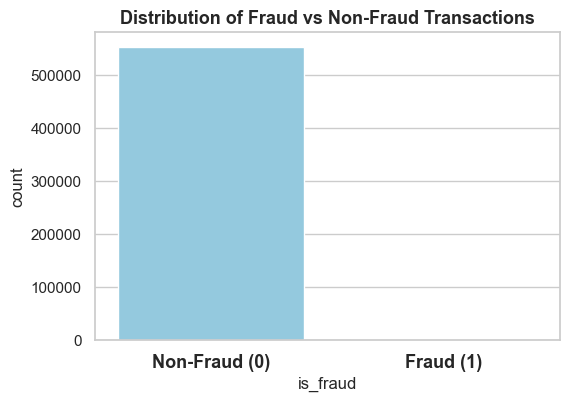

In [130]:
sns.set(style = "whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data = df_test , x = 'is_fraud', palette = ['skyblue', 'red'])
plt.title('Distribution of Fraud vs Non-Fraud Transactions',fontsize = 13 , fontweight = 'bold')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'] , fontsize = 13, fontweight = 'bold')
plt.show()

In [131]:
test_corr = df_test.select_dtypes(include = ["int","float"])
test_corr

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year
0,2291163933867244,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,12,21,6,6,2020
1,3573030041201292,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,12,21,6,6,2020
2,3598215285024754,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,12,21,6,6,2020
3,3591919803438423,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,12,21,6,6,2020
4,3526826139003047,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,12,21,6,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,23,31,3,12,2020
555715,3556613125071656,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,23,31,3,12,2020
555716,6011724471098086,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,23,31,3,12,2020
555717,4079773899158,7.99,44.6255,-116.4493,129,44.470525,-117.080888,0,23,31,3,12,2020


In [132]:
corr_test = test_corr.corr()
corr_test

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year
cc_num,1.000000,0.001963,-0.057512,-0.048783,-0.009414,-0.057183,-0.048818,-0.001540,-0.001137,-0.001735,0.003031,-0.000542,NaN
amt,0.001963,1.000000,0.002339,-0.002046,0.002760,0.002404,-0.002053,0.182267,-0.029860,-0.000829,0.003414,-0.000717,NaN
lat,-0.057512,0.002339,1.000000,-0.012892,-0.152666,0.993557,-0.012831,0.005863,-0.010676,-0.002297,0.001093,0.000686,NaN
long,-0.048783,-0.002046,-0.012892,1.000000,-0.051524,-0.012551,0.999115,-0.000972,-0.001595,0.000334,0.000099,-0.001510,NaN
city_pop,-0.009414,0.002760,-0.152666,-0.051524,1.000000,-0.151703,-0.051489,-0.004910,0.018937,0.001938,-0.002010,-0.001117,NaN
merch_lat,-0.057183,0.002404,0.993557,-0.012551,-0.151703,1.000000,-0.012496,0.005812,-0.010512,-0.002302,0.001199,0.000750,NaN
merch_long,-0.048818,-0.002053,-0.012831,0.999115,-0.051489,-0.012496,1.000000,-0.001060,-0.001639,0.000277,0.000074,-0.001526,NaN
is_fraud,-0.001540,0.182267,0.005863,-0.000972,-0.004910,0.005812,-0.001060,1.000000,0.011686,-0.009203,0.009365,-0.011748,NaN
hour,-0.001137,-0.029860,-0.010676,-0.001595,0.018937,-0.010512,-0.001639,0.011686,1.000000,-0.000161,0.001516,-0.004995,NaN
day,-0.001735,-0.000829,-0.002297,0.000334,0.001938,-0.002302,0.000277,-0.009203,-0.000161,1.000000,-0.038866,-0.104058,NaN


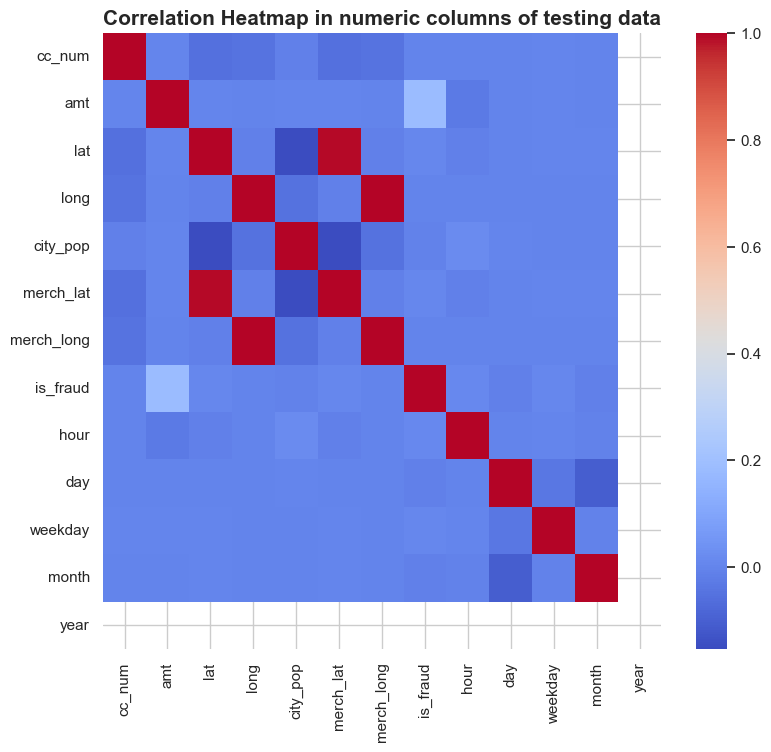

In [133]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_test, cmap='coolwarm', annot = False)
plt.title("Correlation Heatmap in numeric columns of testing data" , fontsize = 15 , fontweight = 'bold')
plt.show()

In [134]:
test_target_corr = corr_test['is_fraud'].sort_values(ascending=False)
print("🔝 Top correlated features with 'is_fraud' of test data:\n")
print(test_target_corr.head(10))

🔝 Top correlated features with 'is_fraud' of test data:

is_fraud      1.000000
amt           0.182267
hour          0.011686
weekday       0.009365
lat           0.005863
merch_lat     0.005812
long         -0.000972
merch_long   -0.001060
cc_num       -0.001540
city_pop     -0.004910
Name: is_fraud, dtype: float64


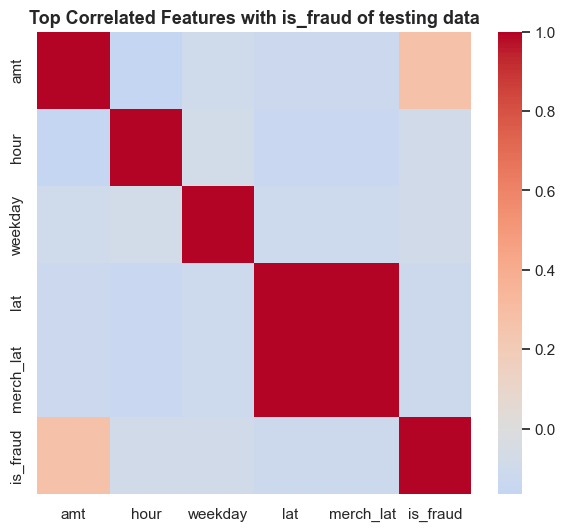

In [135]:
top_features = test_target_corr.index[1:6]
subset = corr_test[top_features.tolist() + ['is_fraud']]
plt.figure(figsize = (7,6))
sns.heatmap(subset.corr(), cmap ='coolwarm', center = 0, annot = False)
plt.title("Top Correlated Features with is_fraud of testing data",fontsize = 13 ,  fontweight = 'bold')
plt.show()  

C:\Users\HP\AppData\Local\Temp\ipykernel_3700\2681831743.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.boxplot(x ='is_fraud', y = 'amt' , data = df_test , hue = 'is_fraud', color = 'r')


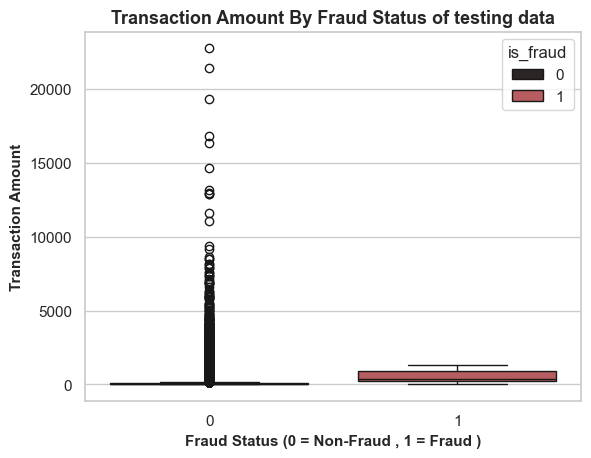

In [136]:
sns.set(style = "whitegrid")
sns.boxplot(x ='is_fraud', y = 'amt' , data = df_test , hue = 'is_fraud', color = 'r')
plt.title("Transaction Amount By Fraud Status of testing data", fontsize = 13 , fontweight = 'bold')
plt.xlabel("Fraud Status (0 = Non-Fraud , 1 = Fraud )", fontsize = 11, fontweight = 'bold')
plt.ylabel("Transaction Amount" , fontsize = 11, fontweight = 'bold')
plt.show()

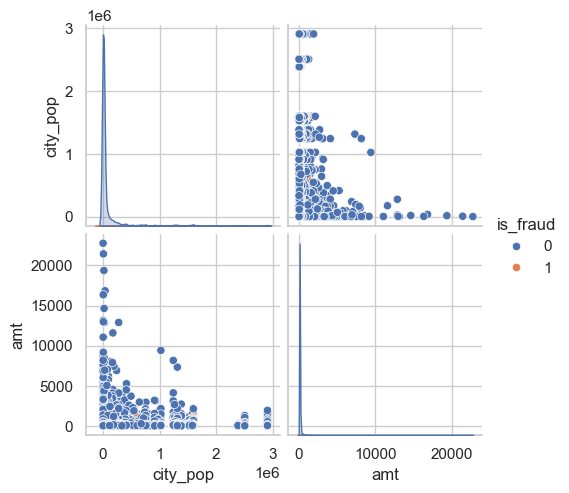

In [137]:
sns.pairplot(df_test , vars =['city_pop','amt'] , hue = 'is_fraud')
plt.show()

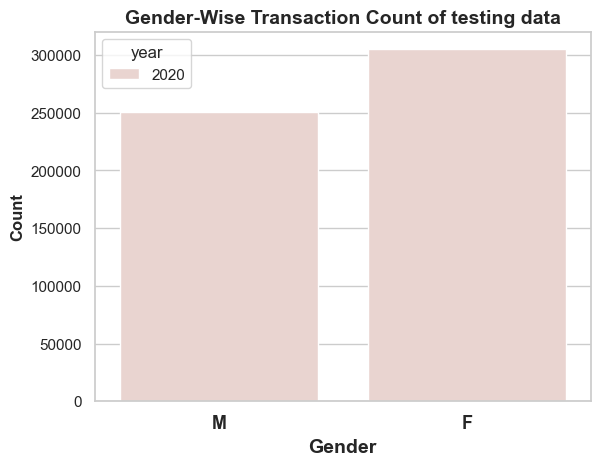

In [138]:
sns.countplot(x = 'gender' , data = df_test , hue = "year") 
plt.title("Gender-Wise Transaction Count of testing data" , fontsize = 14 , fontweight = 'bold')
plt.xticks(['M','F'] , fontsize = 13, fontweight = 'bold')
plt.xlabel("Gender",fontsize = 14 , fontweight = 'bold')
plt.ylabel("Count",fontsize = 12 , fontweight = 'bold')
plt.show()

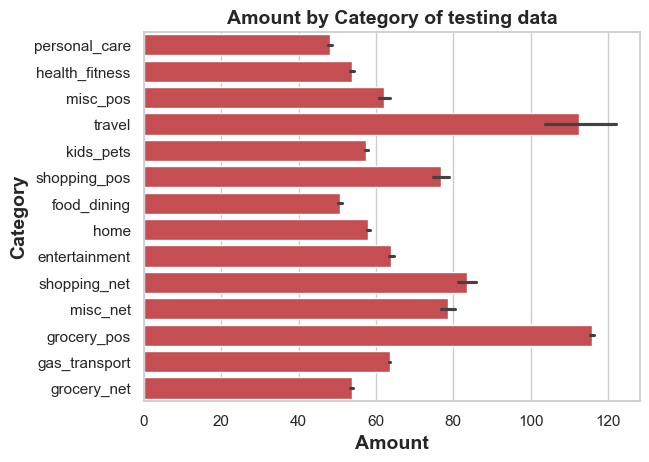

In [139]:
sns.barplot(x = "amt" , y = "category" , data = df_test , saturation = 1 , color = 'r' )
plt.xlabel('Amount', fontsize = 14 , fontweight = 'bold')
plt.ylabel('Category', fontsize = 14 , fontweight = 'bold')
plt.title('Amount by Category of testing data', fontsize=14, fontweight = 'bold')
plt.show()

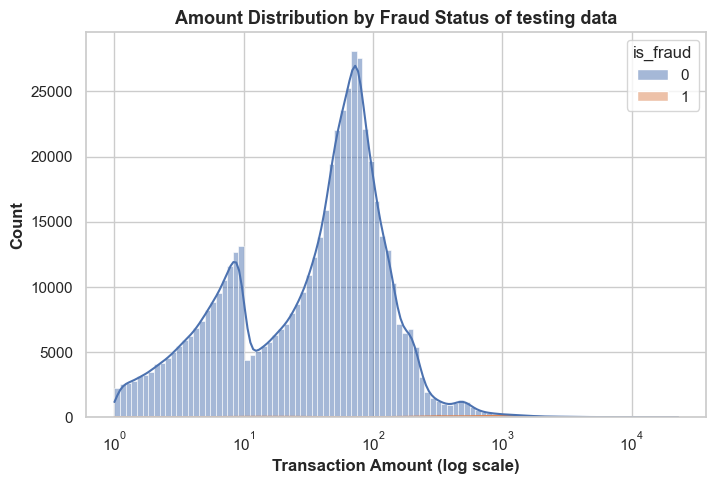

In [140]:
plt.figure(figsize=(8,5))
sns.histplot(data = df_test, x='amt', hue = 'is_fraud', bins = 100, kde = True, log_scale = True)
plt.title('Amount Distribution by Fraud Status of testing data', fontsize = 13, fontweight = 'bold')
plt.xlabel('Transaction Amount (log scale)' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Count',  fontweight = 'bold' , fontsize = 12)
plt.show()

In [141]:
le

LabelEncoder()

In [142]:
b = list(cat_test.columns) 
for i in b :
    cat_test[i] = le.fit_transform(cat_test[i])

In [143]:
cat_test

,merchant,category,gender,job
0,319,10,1,275
1,591,10,0,392
2,611,5,0,259
3,222,9,1,407
4,292,13,1,196
...,...,...,...,...
555714,507,5,1,460
555715,264,7,1,198
555716,496,7,0,294
555717,75,13,1,58


In [144]:
scl

,copy,True
,with_mean,True
,with_std,True


In [145]:
num_test = scl.fit_transform(num_test)
num_test

array([[-0.31725171, -0.42446311, -0.90437717, ...,  1.50238768,
        -1.77359693,  0.        ],
       [-0.31627306, -0.25233729,  0.35118172, ...,  1.50238768,
        -1.77359693,  0.        ],
       [-0.31625383, -0.17935288,  0.42076815, ...,  1.50238768,
        -1.77359693,  0.        ],
       ...,
       [-0.31441123,  0.11156401,  1.51212126, ...,  0.12540663,
         1.25945795,  0.        ],
       [-0.31899779, -0.39173496,  1.20170888, ...,  0.12540663,
         1.25945795,  0.        ],
       [-0.31581678, -0.19944911, -0.56837864, ...,  0.12540663,
         1.25945795,  0.        ]], shape=(555719, 13))

In [146]:
num_test = pd.DataFrame(num_test , columns = ["cc_num","amt","lat","long","city_pop","merch_lat","merch_long","is_fraud","hour","day","weekday","month","year"])
num_test

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year
0,-0.317252,-0.424463,-0.904377,0.677451,0.816521,-0.894145,0.657586,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0
1,-0.316273,-0.252337,0.351182,-1.472454,-0.292685,0.178126,-1.436610,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0
2,-0.316254,-0.179353,0.420768,1.216667,-0.178853,0.383257,1.167640,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0
3,-0.316259,-0.059605,-1.970539,0.685934,-0.111371,-1.909485,0.680717,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0
4,-0.316308,-0.422358,1.128092,0.380004,-0.289942,1.259139,0.316510,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,-0.318978,-0.163467,0.385244,-0.120967,-0.291963,0.275527,-0.080241,-0.062248,1.496265,1.623183,0.125407,1.259458,0.0
555715,-0.316286,0.270803,-1.877757,-0.379599,-0.198018,-1.742946,-0.433644,-0.062248,1.496265,1.623183,0.125407,1.259458,0.0
555716,-0.314411,0.111564,1.512121,-2.089408,-0.281427,1.592587,-2.146912,-0.062248,1.496265,1.623183,0.125407,1.259458,0.0
555717,-0.318998,-0.391735,1.201709,-1.910685,-0.293261,1.163252,-1.955100,-0.062248,1.496265,1.623183,0.125407,1.259458,0.0


In [147]:
X_test = pd.concat([num_test,cat_test],axis = 1 )
X_test.head(5)

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,weekday,month,year,merchant,category,gender,job
0,-0.317252,-0.424463,-0.904377,0.677451,0.816521,-0.894145,0.657586,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0,319,10,1,275
1,-0.316273,-0.252337,0.351182,-1.472454,-0.292685,0.178126,-1.436610,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0,591,10,0,392
2,-0.316254,-0.179353,0.420768,1.216667,-0.178853,0.383257,1.167640,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0,611,5,0,259
3,-0.316259,-0.059605,-1.970539,0.685934,-0.111371,-1.909485,0.680717,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0,222,9,1,407
4,-0.316308,-0.422358,1.128092,0.380004,-0.289942,1.259139,0.316510,-0.062248,-0.118789,0.506526,1.502388,-1.773597,0.0,292,13,1,196


In [148]:
X_test.drop(columns = ["is_fraud"] , axis = 1 , inplace = True)

In [149]:
y_test = df_test["is_fraud"]
y_test

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [150]:
y_test.shape

(555719,)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [152]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [153]:
models = {
    "LR": LogisticRegression(class_weight = "balanced"),
          "DT": DecisionTreeClassifier(class_weight = "balanced" , max_depth = 8, min_samples_split = 10,min_samples_leaf = 5),
          "RF": RandomForestClassifier(class_weight = "balanced", n_estimators = 200, max_depth = 10, min_samples_split = 10, min_samples_leaf = 5),
          "XG": XGBClassifier(class_weight = "balanced",  n_estimators = 200, learning_rate = 0.05, max_depth = 4, subsample = 0.8, colsample_bytree = 0.8, reg_lambda = 1,reg_alpha = 0.5, eval_metric='logloss')}

In [154]:
results = []

In [155]:
for model_name, model in models.items():
    print("="*60)
    print(f"Model: {model_name}")
    print("="*60)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}%")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print("\n")
    results.append([model_name, acc])

Model: LR


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 93.90%
F1-Score: 0.0876
Confusion Matrix:
[[520203  33371]
 [   518   1627]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.76      0.09      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.85      0.53    555719
weighted avg       1.00      0.94      0.97    555719



Model: DT
Accuracy: 97.05%
F1-Score: 0.1994
Confusion Matrix:
[[537300  16274]
 [   105   2040]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.11      0.95      0.20      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.96      0.59    555719
weighted avg       1.00      0.97      0.98    555719



Model: RF
Accuracy: 98.18%
F1-Score: 0.2748
Confusion Matrix:
[[543689   9885]
 [   229   1916]]

Classificati

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 99.79%
F1-Score: 0.7062
Confusion Matrix:
[[553178    396]
 [   758   1387]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.65      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.82      0.85    555719
weighted avg       1.00      1.00      1.00    555719





In [156]:
accuracy_table = pd.DataFrame(results, columns=['Model', 'Accuracy (%)'])
print("\n Model Accuracy Comparison")
print(accuracy_table.to_string(index=False))


 Model Accuracy Comparison
Model  Accuracy (%)
   LR     93.901774
   DT     97.052647
   RF     98.180015
   XG     99.792341


C:\Users\HP\AppData\Local\Temp\ipykernel_3700\3131516293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Model' , y = 'Accuracy (%)' ,  data = accuracy_table , palette = 'viridis')


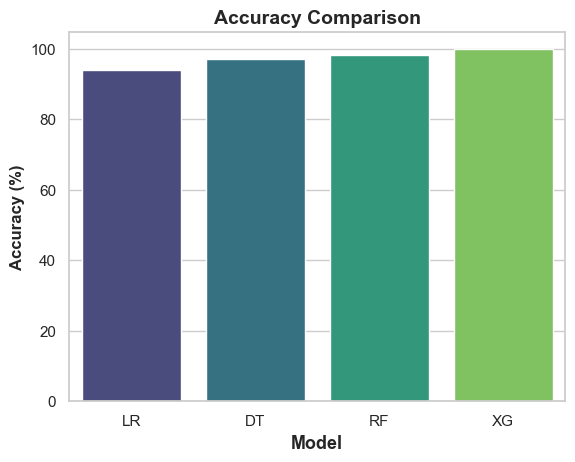

In [157]:
sns.barplot(x = 'Model' , y = 'Accuracy (%)' ,  data = accuracy_table , palette = 'viridis')
plt.title('Accuracy Comparison', fontsize = 14 , fontweight = 'bold') 
plt.xlabel("Model", fontsize = 13 , fontweight = 'bold')
plt.ylabel("Accuracy (%)", fontsize = 12 , fontweight = 'bold')
sns.set(style = "whitegrid")
plt.show()